<a href="https://colab.research.google.com/github/MSaberian/PyLearnMachineLearning/blob/main/titanic2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data_train = pd.read_csv("train.csv")
data_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## preprocess

In [ ]:
data_train = data_train.replace(["female", "male"], [0, 1])
data_train = data_train.replace(["S", "C", "Q"], [0, 1, 2])
data_train = data_train.fillna(0)
data_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0,0.0


In [ ]:
X_total = np.array(data_train[["Pclass", "Sex", "Age", "SibSp", "Parch"]])
Y_total = np.array(data_train[["Survived"]])

## Multilayer perceptron model

In [ ]:
model = tf.keras.models.Sequential([
    Dense(5, activation="relu"),
    Dense(128, activation="tanh"),
    Dense(42, activation="selu"),
    Dense(10, activation="sigmoid"),#relu sigmoid selu
    Dense(2, activation="softmax")
])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.losses.sparse_categorical_crossentropy,
              # loss=tf.losses.mean_squared_error
              metrics=['accuracy'])

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_total, Y_total, test_size=0.2, shuffle=True)

In [ ]:
# train
train_output = model.fit(X_train, Y_train, epochs=400)

Epoch 1/400
23/23 [==============================] - 0s 2ms/step - loss: 0.3998 - accuracy: 0.8272
Epoch 2/400
23/23 [==============================] - 0s 2ms/step - loss: 0.3956 - accuracy: 0.8343
Epoch 3/400
23/23 [==============================] - 0s 2ms/step - loss: 0.3892 - accuracy: 0.8399
Epoch 4/400
23/23 [==============================] - 0s 3ms/step - loss: 0.3931 - accuracy: 0.8371
Epoch 5/400
23/23 [==============================] - 0s 1ms/step - loss: 0.3881 - accuracy: 0.8385
Epoch 6/400
23/23 [==============================] - 0s 1ms/step - loss: 0.4190 - accuracy: 0.8216
Epoch 7/400
23/23 [==============================] - 0s 1ms/step - loss: 0.4020 - accuracy: 0.8357
Epoch 8/400
23/23 [==============================] - 0s 1ms/step - loss: 0.3972 - accuracy: 0.8399
Epoch 9/400
23/23 [==============================] - 0s 1ms/step - loss: 0.3826 - accuracy: 0.8427
Epoch 10/400
23/23 [==============================] - 0s 1ms/step - loss: 0.3889 - accuracy: 0.8441
Epoch 11/

In [ ]:
results = model.evaluate(X_test, Y_test, batch_size=128)
print("test loss, test acc:", results)

2/2 [==============================] - 0s 5ms/step - loss: 0.4350 - accuracy: 0.8156
test loss, test acc: [0.4349953532218933, 0.8156424760818481]


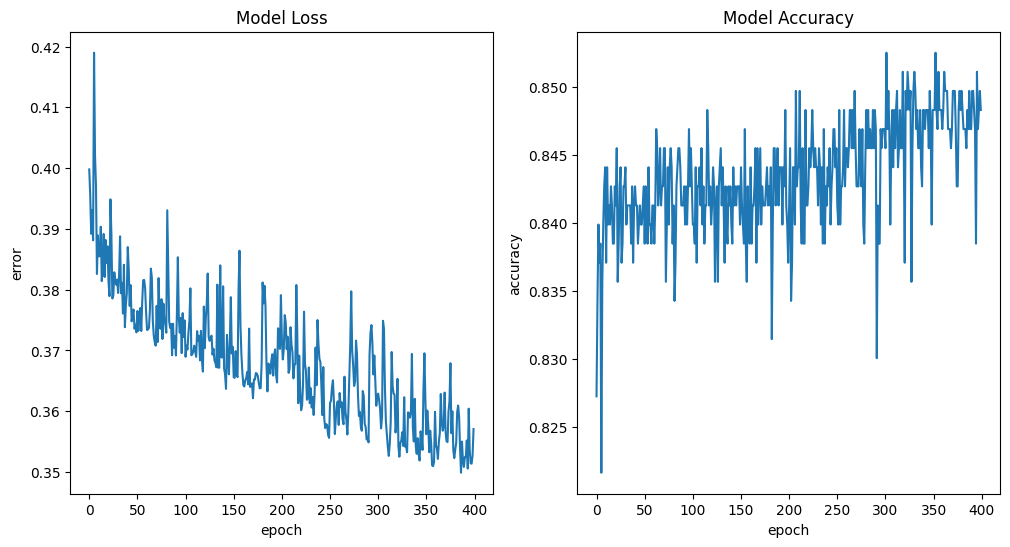

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))

ax1.plot(train_output.history['loss'])
ax1.set_title("Model Loss")
ax1.set_xlabel("epoch")
ax1.set_ylabel("error")

ax2.plot(train_output.history['accuracy'])
ax2.set_title("Model Accuracy")
ax2.set_xlabel("epoch")
ax2.set_ylabel("accuracy")

plt.show()

In [ ]:
jack = np.array([[3, 1, 36, 0, 0]])

result = model.predict(jack)
print(np.argmax(result))

rose = np.array([[1, 0, 28, 0, 0]])

result = model.predict(rose)
print(np.argmax(result))

1/1 [==============================] - 0s 15ms/step
0
1/1 [==============================] - 0s 17ms/step
1


In [ ]:
model.save("my_titanic.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model = tf.keras.models.load_model("my_titanic.h5")

## Perceptron model

In [ ]:
model = tf.keras.models.Sequential([
    Dense(5, activation="relu"),
    Dense(2, activation="softmax")
])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.losses.sparse_categorical_crossentropy,
              # loss=tf.losses.mean_squared_error
              metrics=['accuracy'])

In [ ]:
train_output = model.fit(X_train, Y_train, epochs=400)

Epoch 1/400
23/23 [==============================] - 0s 1ms/step - loss: 17.4637 - accuracy: 0.3848
Epoch 2/400
23/23 [==============================] - 0s 1ms/step - loss: 15.2530 - accuracy: 0.3848
Epoch 3/400
23/23 [==============================] - 0s 1ms/step - loss: 13.0788 - accuracy: 0.3848
Epoch 4/400
23/23 [==============================] - 0s 1ms/step - loss: 10.9495 - accuracy: 0.3848
Epoch 5/400
23/23 [==============================] - 0s 1ms/step - loss: 8.8310 - accuracy: 0.3890
Epoch 6/400
23/23 [==============================] - 0s 1ms/step - loss: 6.7790 - accuracy: 0.3989
Epoch 7/400
23/23 [==============================] - 0s 1ms/step - loss: 4.7219 - accuracy: 0.4003
Epoch 8/400
23/23 [==============================] - 0s 1ms/step - loss: 2.7520 - accuracy: 0.4270
Epoch 9/400
23/23 [==============================] - 0s 4ms/step - loss: 1.0638 - accuracy: 0.4817
Epoch 10/400
23/23 [==============================] - 0s 1ms/step - loss: 0.6613 - accuracy: 0.6124
Epoch

In [ ]:
results = model.evaluate(X_test, Y_test, batch_size=128)
print("test loss, test acc:", results)

2/2 [==============================] - 0s 5ms/step - loss: 0.4288 - accuracy: 0.7765
test loss, test acc: [0.4287826418876648, 0.7765362858772278]


## KNN